In [165]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import suntime
import pandas as pd

In [166]:
# A biblioteca suntime permite mostrar a hora do pôr do sol para 
# um local do globo

latitude_curitiba,longitude_curitiba = -25.25,-49.16
sun_curitiba = suntime.Sun(latitude_curitiba,longitude_curitiba)
print(f"Pôr do sol em Curitiba - PR: {sun_curitiba.get_local_sunset_time()}")

la_f,lo_f = -3.43,-38.32
sun_sarandi = suntime.Sun(la_f,lo_f)
print(f"Pôr do sol em Fortaleza - CE: {sun_sarandi.get_local_sunset_time()}")

la_s,lo_s = -27.56,-52.55
sun_sarandi = suntime.Sun(la_s,lo_s)
print(f"Pôr do sol em Sarandi - RS: {sun_sarandi.get_local_sunset_time()}")

la_b,lo_b = -15.47,-47.52
sun_brasilia = suntime.Sun(la_b,lo_b)
print(f"Pôr do sol em Brasília - DF: {sun_brasilia.get_local_sunset_time()}")

la_b0,lo_b0 = 51.31,7.31
sun_bochum = suntime.Sun(la_b0,lo_b0)
print(f"Pôr do sol em Bochum - GE: {sun_bochum.get_local_sunset_time()}")

Pôr do sol em Curitiba - PR: 2023-01-18 19:12:00-03:00
Pôr do sol em Fortaleza - CE: 2023-01-18 17:52:00-03:00
Pôr do sol em Sarandi - RS: 2023-01-18 19:30:00-03:00
Pôr do sol em Brasília - DF: 2023-01-18 18:48:00-03:00
Pôr do sol em Bochum - GE: 2023-01-18 12:56:00-03:00


In [167]:
# Definindo uma função que pega um dia e retorna o horário do pôr do sol 
# para os 3 locais definidos anteriormente

# Primeiro, organizando os dados em uma lista de dicionários

locais = [
    {"latitude":latitude_curitiba,"longitude":longitude_curitiba,"local":"Curitiba - PR"},
    {"latitude":la_f,"longitude":lo_f,"local":"Fortaleza - CE"},
    {"latitude":la_s,"longitude":lo_s,"local":"Sarandi - RS"},
    {"latitude":la_b,"longitude":lo_b,"local":"Brasília - DF"},
    # {"latitude":la_b0,"longitude":lo_b0,"local":"Bochum - GE"},
]

In [168]:
# Vamos criar uma tabela com todos os dias do ano 
# para podermos iterar sobre os locais e obter os horários

dias = pd.Series(pd.date_range(start="2023-01-01",periods=365,freq='D'))

df = pd.DataFrame({"dias":dias})

for loc in locais:

    # Definindo o obj Sol daquele local
    sun = suntime.Sun(loc['latitude'],loc['longitude'])

    # Escrevendo o horário na tabela
    df[loc['local']] = df['dias'].apply(lambda x: sun.get_local_sunset_time(x))

# Definindo `dias` como o index
df.set_index('dias')

df.to_csv("local_sunset_time_2023.csv")

In [169]:
df

,dias,Curitiba - PR,Fortaleza - CE,Sarandi - RS,Brasília - DF
0,2023-01-01,2023-01-01 19:10:00-03:00,2023-01-01 17:46:00-03:00,2023-01-01 19:29:00-03:00,2023-01-01 18:44:00-03:00
1,2023-01-02,2023-01-02 19:11:00-03:00,2023-01-02 17:47:00-03:00,2023-01-02 19:29:00-03:00,2023-01-02 18:45:00-03:00
2,2023-01-03,2023-01-03 19:11:00-03:00,2023-01-03 17:47:00-03:00,2023-01-03 19:30:00-03:00,2023-01-03 18:45:00-03:00
3,2023-01-04,2023-01-04 19:11:00-03:00,2023-01-04 17:48:00-03:00,2023-01-04 19:30:00-03:00,2023-01-04 18:45:00-03:00
4,2023-01-05,2023-01-05 19:11:00-03:00,2023-01-05 17:48:00-03:00,2023-01-05 19:30:00-03:00,2023-01-05 18:46:00-03:00
...,...,...,...,...,...
360,2023-12-27,2023-12-27 19:09:00-03:00,2023-12-27 17:44:00-03:00,2023-12-27 19:27:00-03:00,2023-12-27 18:42:00-03:00
361,2023-12-28,2023-12-28 19:09:00-03:00,2023-12-28 17:44:00-03:00,2023-12-28 19:28:00-03:00,2023-12-28 18:43:00-03:00
362,2023-12-29,2023-12-29 19:09:00-03:00,2023-12-29 17:45:00-03:00,2023-12-29 19:28:00-03:00,2023-12-29 18:43:00-03:00
363,2023-12-30,2023-12-30 19:10:00-03:00,2023-12-30 17:45:00-03:00,2023-12-30 19:28:00-03:00,2023-12-30 18:44:00-03:00


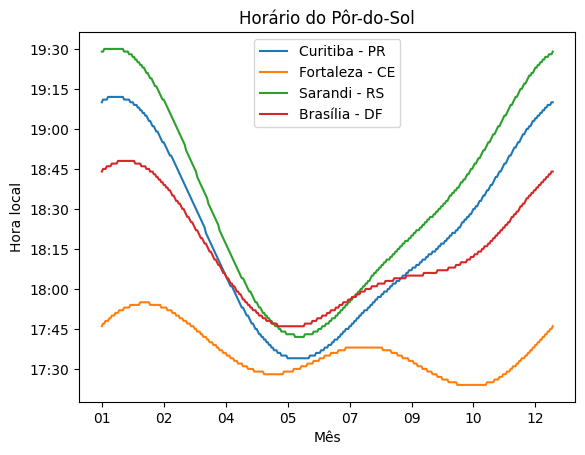

In [170]:
ax = plt.subplot()
for loc in locais:
    # Dando relpace para uma data aleatória nos objetos datetime 
    # para poder exibi-los no gráfico
    y = df[loc['local']].apply(lambda x: x.replace(year = 2000,month=1,day=1,tzinfo = None))
    ax.plot(df.index,y,label = loc['local'])
ax.yaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_formatter(DateFormatter('%m'))

plt.ylabel("Hora local")
plt.xlabel("Mês")
plt.title("Horário do Pôr-do-Sol")
plt.legend()
plt.show()